# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 20, 11:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Run the following cell to import NumPy, Matplotlib. If anything else is needed you can import this yourself.

In [49]:
import numpy as np
import matplotlib.pyplot as plt


# Exercise 1
N.B.1. you are to implement the methods yourself.

N.B.2. Tentative distribution of points is 2+1+2+2+2 points (plus 1 point makes 10).

Given a function $f$, let $T(f,a,b,m)$ denote the composite trapezoid rule with $m$ subintervals over the interval $[a,b]$. 

## (a)
Approximate the integral of $x^{-3}$ over $[a,b] = [ \frac{1}{10}, 100 ]$ by the composite trapezoid rule $T(f,a,b,m)$ for $m = 2^k$. Plot the absolute approximation error for different values of $k$. Find the smallest $k$ such that the exact error is less than $\epsilon = 10^{-3}$. Explain the slow convergence.

In [50]:
def composite_trapezoid(func, a, b, m):
    h = (b-a)/m
    est_integral = np.sum([h*func(a+h*i) for i in range(m+1)])
    est_integral -= (h*func(a) + h*func(b))/2 # the first and final indices contribute only half
    return est_integral

def f(x):
    """Function to estimate the integral for."""
    return x**-3

def F(x):
    """Primitive of the function above, to recover the true integral."""
    return -(1/2)*x**-2

In [51]:
a = 1/10
b = 100
ks = np.arange(5, 21, 1)
ms = [int(2**ks[i]) for i in range(len(ks))]
errors = []
true_integral = F(b) - F(a)

for i in range(len(ms)):
    estimated_integral = composite_trapezoid(func=f, a=a, b=b, m=ms[i])
    error = abs(estimated_integral - true_integral)
    errors.append(error)
    if error < 10**-3: # terminate the computations if the error is below the desired upper bound
        ms = ms[:i+1] # use only the ms up to and including the last one
        print(r"The first m for which the error is below 10^-3 is: ", ms[-1])
        break

The first m for which the error is below 10^-3 is:  262144


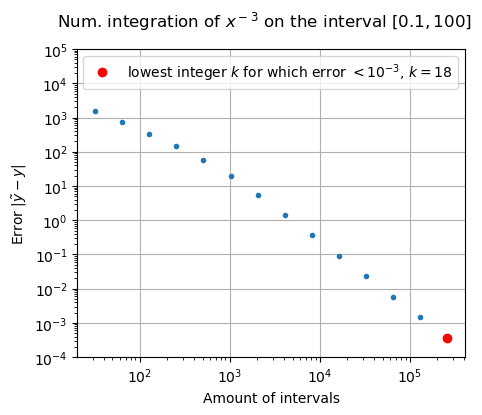

In [52]:
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ms, errors, "o", markersize=3)
if np.min(errors) < 10**-3:
    plt.plot(ms[-1], errors[-1], "o", color="red", label=r"lowest integer $k$ for which error $<10^{-3}$" + rf", $k={int(np.log2(ms[-1]))}$")
ax.set_ylim(1e-4, 1e5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Amount of intervals")
ax.set_ylabel(r"Error $|\tilde{y}-y|$")
ax.grid()
fig.suptitle(fr"Num. integration of $x^-$$^3$ on the interval $[{a}, {b}]$")
ax.legend(loc="upper right")

As can be seen in the plot above, the first tested integer $k$ for which the absolute error is smaller than $10^{-3}$ is at $k=18$, in which case $m=262144$ (see output cell above). For computational efficiency the computations are terminated once the allowed error is reached.

The plot above also shows a slow convergence towards small errors. This is an effect of the shape of the original function $f=x^{-3}$ and its large variability of the tested interval. We can understand this by looking at the theoretical error of the algorithm. The error bound for the composite trapezoid rule is given by $|E| \leq \frac{(b-a)^3}{12m^2} \max_{x \in [a,b]} |f''(x)|$. For our function $f(x) = x^{-3}$, the second derivative is $f''(x) = 12x^{-5}$. At the left endpoint $x = 1/10$, we have $|f''(1/10)| = 12 \times (1/10)^{-5} = 1,200,000$, which is enormous. This huge value of $\max|f''(x)|$ means that even though the error decreases as $O(m^{-2})$, the constant factor is massive, requiring a very large $m$ to achieve the desired tolerance.

An equispaced sampling of the $x$-axis results in very large errors, and a more suitable approach in this case would be to have a higher density of sampling points at the start of the interval.

As a verification of our hypothesis, the same computation is repeated over an interval $[\frac{2}{10}, 100+\frac{1}{10}]$ below. As can be seen, even such a small shift reduces the amount of intervals needed to acquire the same accuracy by a factor 4. This shows that the subintervals on the leftmost side of the x-axis indeed contribute large parts of the error.

In [53]:
a_shifted = a + a
b_shifted = b + a
ks = np.arange(5, 21, 1)
ms_shifted = [int(2**ks[i]) for i in range(len(ks))]
errors_shifted = []
true_integral_shifted = F(b_shifted) - F(a_shifted)

for i in range(len(ms_shifted)):
    estimated_integral = composite_trapezoid(func=f, a=a_shifted, b=b_shifted, m=ms_shifted[i])
    error = abs(estimated_integral - true_integral_shifted)
    errors_shifted.append(error)
    if error < 10**-3: # terminate the computations if the error is below the desired upper bound
        ms_shifted = ms_shifted[:i+1] # use only the ms up to and including the last one
        print(r"The first m for which the error is below 10^-3 is: ", ms_shifted[-1])
        break

The first m for which the error is below 10^-3 is:  65536


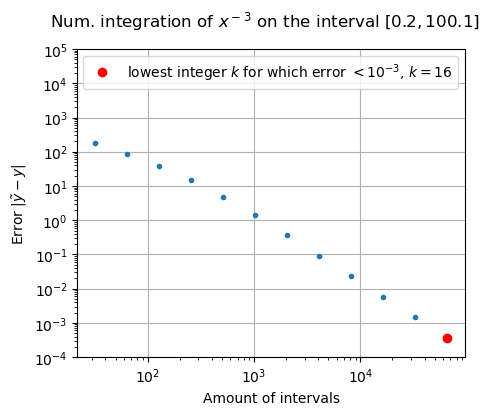

In [54]:
fig, ax = plt.subplots(1, figsize=(5,4))
ax.plot(ms_shifted, errors_shifted, "o", markersize=3)
if np.min(errors_shifted) < 10**-3:
    plt.plot(ms_shifted[-1], errors_shifted[-1], "o", color="red", label=r"lowest integer $k$ for which error $<10^{-3}$" + rf", $k={int(np.log2(ms_shifted[-1]))}$")
ax.set_ylim(1e-4, 1e5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Amount of intervals")
ax.set_ylabel(r"Error $|\tilde{y}-y|$")
ax.grid()
fig.suptitle(fr"Num. integration of $x^-$$^3$ on the interval $[{a_shifted}, {b_shifted}]$")
ax.legend(loc="upper right")

## (b)

To improve the convergence rate of the above problem, we may use an adaptive strategy, as discussed in the book and the lecture. Consider the following formulas for approximate integration
$$I_1(f,a,b) = T(f,a,b,1)$$
$$I_2(f,a,b) = T(f,a,b,2).$$
Show, based on the precise error estimates for the trapezoid rule from the book/lecture that the error in $I_2$ can be estimated by a formula of the form 
$$E_2 = C (I_1 - I_2)$$
and determine the constant $C$ (if you can't find $C$, you may take $C = 0.5$).



We know the *precise* error formula for the composite trapezoid rule with $m$ subintervals and step size $h = (b-a)/m$:

$$
\int_a^b f(x)\,dx - T(f,a,b,m)
= -\frac{b-a}{12}h^{2} f''(\xi)
= -\frac{(b-a)^3}{12m^{2}} f''(\xi),
\qquad \xi\in(a,b).
$$

Define the exact integral

$$
I = \int_a^b f(x)\,dx,
$$

and

$$
I_1 = T(f,a,b,1),\qquad I_2 = T(f,a,b,2).
$$

Then, using the formula above,

$$
I - I_1 = E_1 = -\frac{(b-a)^3}{12}\,f''(\xi_1),
$$
$$
I - I_2 = E_2 = -\frac{(b-a)^3}{12\cdot 4}\,f''(\xi_2)
= -\frac{(b-a)^3}{48}\,f''(\xi_2),
$$
for some $\xi_1,\xi_2\in(a,b)$.

If $f''$ is continuous and does not vary too wildly, we may approximate
$f''(\xi_1)\approx f''(\xi_2)\approx f''(\xi)$. Then the errors satisfy

$$
E_1 \approx 4E_2.
$$

Now write $I_1$ and $I_2$ in terms of $I$ and the errors:

$$
I_1 = I + E_1,\qquad I_2 = I + E_2.
$$

Subtract:

$$
I_1 - I_2 = (I + E_1) - (I + E_2) = E_1 - E_2.
$$

Using $E_1 \approx 4E_2$,

$$
I_1 - I_2 \approx 4E_2 - E_2 = 3E_2
\quad\Longrightarrow\quad
E_2 \approx \frac{1}{3}(I_1 - I_2).
$$

Thus the error in $I_2$ can be estimated by

$$
E_2 = C\,(I_1 - I_2),
$$

with

$$
C = \tfrac{1}{3}.
$$

(For practical use one would usually take $E_2 \approx \tfrac{1}{3}\,\bigl|I_1 - I_2\bigr|$ for the error magnitude.)


## (c)
An adaptive strategy for computing the integral on an interval $[a,b]$ now is: Compute $I_2$ and $E_2$, and accept $I_2$ as an approximation when the estimated error $E_2$ is less or equal than a desired tolerance $\epsilon$.  Otherwise, apply the procedure to 
$\int_a^{\frac{b+a}{2}} f(x) \, dx$ and $\int_{\frac{b+a}{2}}^b f(x) \, dx$ with tolerances $\frac{\epsilon}{2}$.

Write a recursive python routine that implements the adaptive strategy.

Then apply this routine to the function $x^{-3}$ with $a, b, \epsilon$ as before. What is the exact error in the obtained approximation? 

MAARTEN CELLS
--

In [55]:
def adaptive_trapezoid(func, a, b, tol=1e-3, C=1/3):
    """
    Adaptive trapezoid integration using recursive subdivision.
    Uses the existing composite_trapezoid function.
    Uses C=1/3 as derived in part (b).
    """
    # Compute I1 and I2 using the composite trapezoid rule
    I1 = composite_trapezoid(func, a, b, 1)
    I2 = composite_trapezoid(func, a, b, 2)
    
    # Estimate the error
    E2 = C * abs(I1 - I2)
    
    # Check if tolerance is met
    if E2 <= tol:
        return I2
    else:
        # Recursively split the interval
        mid = (a + b) / 2
        left = adaptive_trapezoid(func, a, mid, tol=tol/2, C=C)
        right = adaptive_trapezoid(func, mid, b, tol=tol/2, C=C)
        return left + right


In [56]:
a = 1/10
b = 100
true_integral = F(b) - F(a)

# Using C=1/3 as derived in part (b)
estimated_integral = adaptive_trapezoid(func=f, a=a, b=b, tol=1e-3, C=1/3)
error = abs(estimated_integral - true_integral)

print(f"Estimated integral: {estimated_integral}")
print(f"True integral: {true_integral}")
print(f"Absolute error: {error}")
print(f"Error < 10^-3: {error < 1e-3}")


Estimated integral: 50.00014849011892
True integral: 49.99994999999999
Absolute error: 0.0001984901189260313
Error < 10^-3: True


## (d)

Modify the code of (c) so that the number of function evaluations is counted. Optimize your implementation such that no unnecessary function evaluations are performed.

Compare the number of function evaluations used in the adaptive strategy of (c) with the result of (a). 
(*Hint*: To count the number of function evaluations, you may use a global variable.)


In [57]:
# Global counter for function evaluations
func_eval_count = 0

def f_counted(x):
    """Wrapper around f that counts evaluations."""
    global func_eval_count
    func_eval_count += 1
    return f(x)

def adaptive_trapezoid_optimized(func, a, b, tol=1e-3, C=1/3, fa=None, fb=None):
    """
    Optimized adaptive trapezoid integration with function evaluation counting.
    
    Key optimization: Pass down pre-computed function values to avoid re-evaluation.
    
    Parameters:
    - func: function to integrate
    - a, b: interval endpoints
    - tol: tolerance for error
    - C: constant in error estimate (default 1/3 from part b)
    - fa, fb: optional pre-computed f(a) and f(b) to avoid recomputation
    
    Returns:
    - Approximation of integral
    """
    h = b - a
    
    # Compute f(a) and f(b) if not provided (only at top level)
    if fa is None:
        fa = func(a)
    if fb is None:
        fb = func(b)
    
    # Compute I1 = T(f,a,b,1) using the endpoint values
    I1 = h * (fa + fb) / 2
    
    # For I2 = T(f,a,b,2), we need the midpoint
    mid = (a + b) / 2
    fmid = func(mid)
    
    # Compute I2 using all three points: a, mid, b
    I2 = (h/2) * (fa/2 + fmid + fb/2)
    
    # Estimate the error
    E2 = C * abs(I1 - I2)
    
    # Check if tolerance is met
    if E2 <= tol:
        return I2
    else:
        # Recursively split, passing down already-computed function values
        # This is the KEY OPTIMIZATION: we reuse fa, fmid, fb without re-evaluating
        left = adaptive_trapezoid_optimized(func, a, mid, tol=tol/2, C=C, fa=fa, fb=fmid)
        right = adaptive_trapezoid_optimized(func, mid, b, tol=tol/2, C=C, fa=fmid, fb=fb)
        return left + right


In [58]:
# Test the optimized version and count function evaluations
func_eval_count = 0  # Reset counter
a = 1/10
b = 100
true_integral = F(b) - F(a)

estimated_integral = adaptive_trapezoid_optimized(func=f_counted, a=a, b=b, tol=1e-3, C=1/3)
error = abs(estimated_integral - true_integral)

print(f"Estimated integral: {estimated_integral}")
print(f"True integral: {true_integral}")
print(f"Absolute error: {error}")
print(f"Error < 10^-3: {error < 1e-3}")
print(f"\nNumber of function evaluations (adaptive): {func_eval_count}")
print(f"Number of function evaluations in part (a): {262144 + 1}")
print(f"Reduction factor: {(262144 + 1) / func_eval_count:.1f}x")

Estimated integral: 50.00014849011892
True integral: 49.99994999999999
Absolute error: 0.0001984901189260313
Error < 10^-3: True

Number of function evaluations (adaptive): 9671
Number of function evaluations in part (a): 262145
Reduction factor: 27.1x


## (e)
In the course of executing the recursive procedure, some subintervals are refined (split into two subintervals) while others aren't as a result of the choices made by the algorithm. It turns out that the choices made by this algorithm are not always optimal. Other algorithms, that decide in a different way which subinterval needs to be refined, may be more efficient in the sense that they require less function evaluations (while using the same formulas for the approximate integral and the approximate error associated with a subinterval).

Can you explain why this is the case? Devise an alternative, non-recursive algorithm that addresses this issue and should to lead a more efficient integral computation. Describe your approach and algorithm in about 5 to 10 sentences (bullet points).
